In [1]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 153kB/s 
     |████████████████████████████████| 14.5MB 146kB/s 
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
path='/content/drive/My Drive/Septimo semestre/Procesamiento de imagen digital/detección de imágenes/Imagenes'
os.chdir(path)
!pwd
!ls

/content/drive/My Drive/Septimo semestre/Procesamiento de imagen digital/detección de imágenes/Imagenes
10corazones	 3picas		 6picas		 9picas		 pica.jpg
10corazones.jpg  3picas.jpg	 6picas.jpg	 9picas.jpg	 p.jpg
10diamantes	 3treboles	 6treboles	 9treboles	 prueba1.jpg
10diamantes.jpg  3treboles.jpg	 6treboles.jpg	 9treboles.jpg	 prueba2.jpg
10picas		 4corazones	 7corazones	 Atreboles.jpg	 prueba3.jpg
10picas.jpg	 4corazones.jpg  7corazones.jpg  corazon.jpg	 prueba4.jpg
10treboles	 4diamantes	 7diamantes	 diamante.jpg	 prueba5.jpg
10treboles.jpg	 4diamantes.jpg  7diamantes.jpg  Jcorazones	 prueba6.jpg
2c.jpg		 4picas		 7picas		 Jcorazones.jpg  prueba7.jpg
2corazones	 4picas.jpg	 7picas.jpg	 Jdiamantes	 prueba8.jpg
2corazones.jpg	 4treboles	 7treboles	 Jdiamantes.jpg  prueba9.jpg
2diamantes	 4treboles.jpg	 7treboles.jpg	 Jpicas		 prueba.jpg
2diamantes.jpg	 5corazones	 8corazones	 Jpicas.jpg	 Qcorazones
2d.jpg		 5corazones.jpg  8corazones.jpg  Jtreboles	 Qcorazones.jpg
2picas		 5diaman

## Import resources and display image

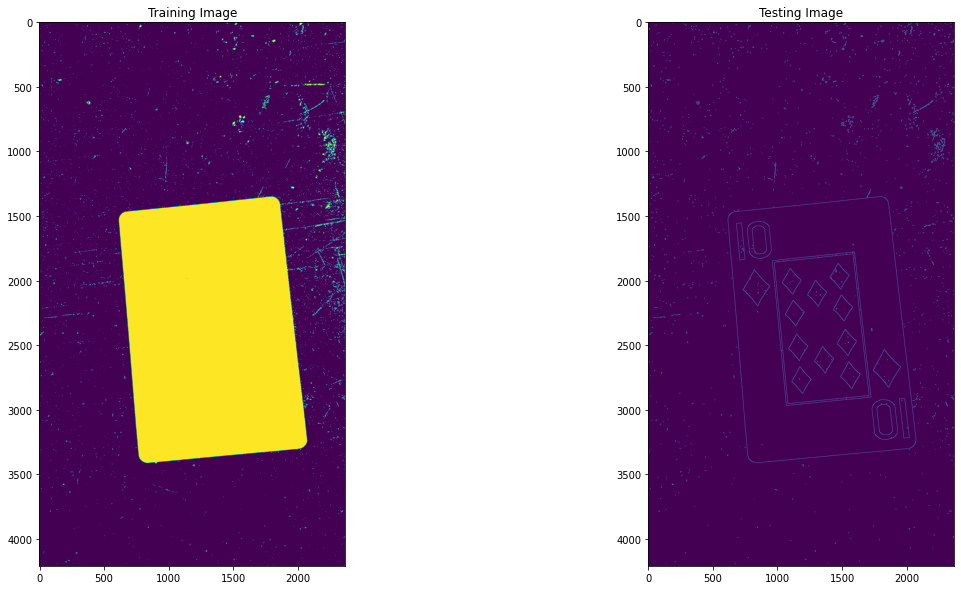

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
%matplotlib inline
from IPython.display import Image

# Load the image

#p = take_photo()
image1=cv2.imread('10diamantes.jpg')

training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)



image2 = cv2.imread('trebol.jpg')
test_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
test_gray = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

#training_gray = cv2.GaussianBlur(training_gray, (7, 7), 3)

t, dst = cv2.threshold(training_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)
_, contours, _ = cv2.findContours(dst, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
areaMax= np.argmax(areas)

mask = np.zeros_like(training_gray) # Create mask where white is what we want, black otherwise
#cv2.drawContours(mask, contours, areaMax, 255, -1)
cv2.drawContours(image1, contours, -1, (0,0,255), 2)
out1 = np.zeros_like(training_gray) # Extract out the object and place into output image
out1[mask == 255] = training_gray[mask == 255]


# Now crop
#(x, y) = np.where(mask == 255)
#(topx, topy) = (np.min(x), np.min(y))
#(bottomx, bottomy) = (np.max(x), np.max(y))
#out1 = out1[topx:bottomx+1, topy:bottomy+1]
#out2=out1
#t, dst = cv2.threshold(out2, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)
# dibujar los contornos




suits = ['diamantes', 'treboles', 'corazones', 'picas']
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

#des,car = sacarCaracterisricas(out1)

#print(car)
mat=[];

#for s, r in product(suits, ranks):  
#stringImg = r+s+'.jpg'
#print(stringImg)
#image2 = cv2.imread(stringImg)


test_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
test_gray = cv2.cvtColor(test_gray, cv2.COLOR_RGB2GRAY)
test_gray = cv2.GaussianBlur(test_gray, (7, 7), 3)
t, tdst = cv2.threshold(test_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)

_, contours, _ = cv2.findContours(tdst, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
areaMax= np.argmax(areas)

mask = np.zeros_like(test_gray) # Create mask where white is what we want, black otherwise
cv2.drawContours(mask, contours, areaMax, 255, -1)
out1 = np.zeros_like(test_gray) # Extract out the object and place into output image
out1[mask == 255] = test_gray[mask == 255]


(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
out1 = out1[topx:bottomx+1, topy:bottomy+1]

    #compararImg(out,r,s)





# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))
bordes = cv2.Canny(training_gray, 90, 200)
plots[0].set_title("Training Image")
plots[0].imshow(dst)

plots[1].set_title("Testing Image")
plots[1].imshow(bordes)

In [ ]:
def compararImg(imgP,r,s):
    sift = cv2.xfeatures2d.SIFT_create()
   # Odescriptor = dO
    Pkeypoints, Pdescriptor = sift.detectAndCompute(imgP, None)
    #Okeypoints, Odescriptor = sift.detectAndCompute(imgP, None)
    save(r+s,Pdescriptor)
    #bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)

   # matches = bf.match(Odescriptor, Pdescriptor)
   # matches = sorted(matches, key = lambda x : x.distance)

    #return len(matches)
    
def sacarCaracterisricas(img):
    sift = cv2.xfeatures2d.SIFT_create()
    Okeypoints, Odescriptor = sift.detectAndCompute(img, None)
    return Odescriptor,len(Okeypoints)

import pickle
def save(filename,object):
    file=open(filename,'wb')
    pickle.dump(object,file)
    file.close()
    print("lo guarde")

def load(filename):
    file=open(filename,'rb')
    object=pickle.load(file)
    file.close()
    return object

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

## Detect keypoints and Create Descriptor

[[1. 0. 0. ... 0. 0. 7.]
 [2. 1. 0. ... 0. 0. 2.]
 [3. 6. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 4.]]
Number of Keypoints Detected In The Training Image:  50
Number of Keypoints Detected In The Query Image:  415


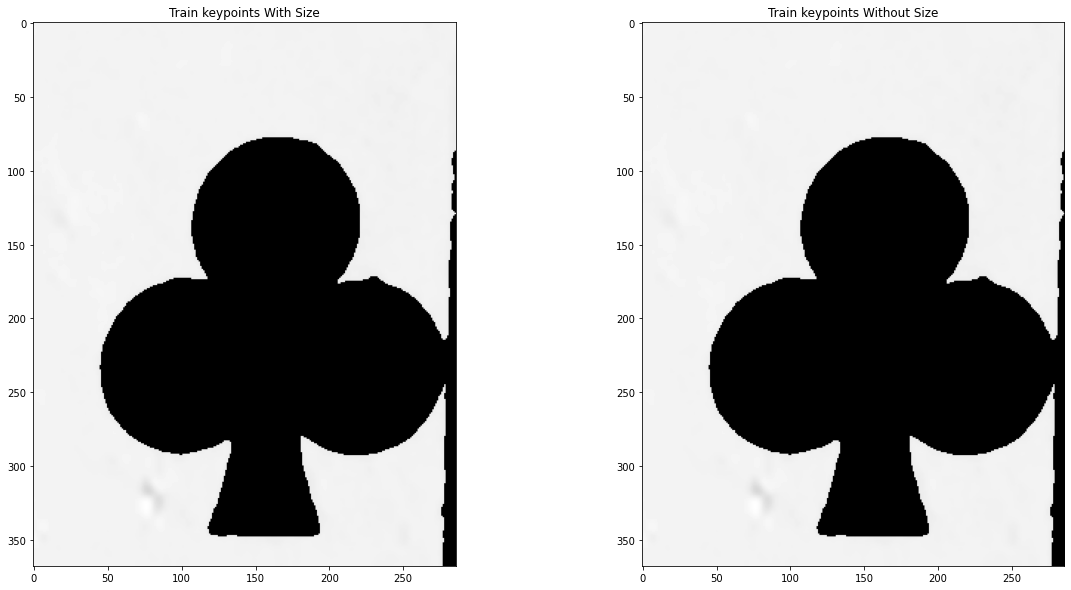

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(out1, None)
test_keypoints, test_descriptor = sift.detectAndCompute(out2, None)

keypoints_without_size = np.copy(out1)
keypoints_with_size = np.copy(out1)

cv2.drawKeypoints(out1, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(out2, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

print(train_descriptor)

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

## Matching Keypoints

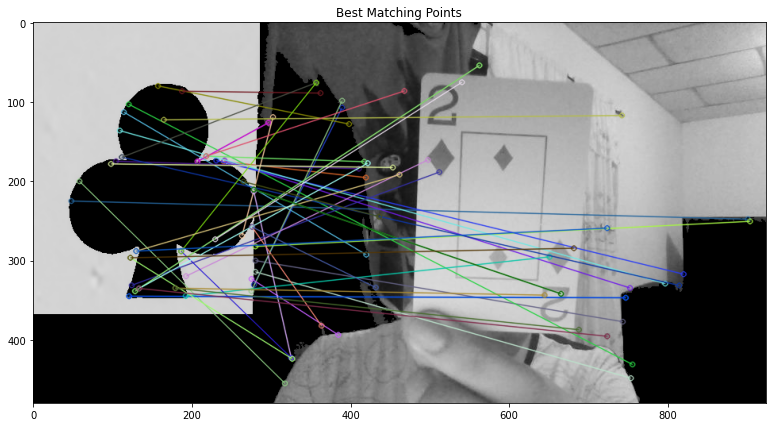


Number of Matching Keypoints Between The Training and Query Images:  50


In [ ]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(out1, train_keypoints, out2, test_keypoints, matches, out2, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))